# Exploratory Data Analysis on Airbnb Dataset

Importing necessary Libraries

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

**Data Cleaning and EDA on Listings.csv**

In [3]:
df_listing=pd.read_csv('/kaggle/input/seattle/listings.csv')
print(df_listing.shape)
df_listing.info()

(3818, 92)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 


In [4]:
df_listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


**Statistical Description of columns**

In [5]:
df_listing.select_dtypes(include=['int64', 'float64']).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
df_listing2 = pd.DataFrame((df_listing.isnull().sum())*100/len(df_listing), columns=['Missing Values'])
df_listing2[df_listing2['Missing Values']>0]

,Missing Values
summary,4.635935
space,14.903091
neighborhood_overview,27.029859
notes,42.063908
transit,24.463070
thumbnail_url,8.381351
medium_url,8.381351
xl_picture_url,8.381351
host_name,0.052383
host_since,0.052383


Removing columns with highest missing values

In [8]:
df_listing3 = pd.DataFrame((df_listing.isnull().sum())*100/len(df_listing), columns=['Missing Values'])
df_listing3[df_listing3['Missing Values']>75]

,Missing Values
square_feet,97.459403
license,100.000000


In [9]:
missings = ['square_feet','license']
for i in missings:
    df_listing= df_listing.drop(columns=[i])

In [10]:
df_listing2[df_listing2['Missing Values']>20]

,Missing Values
neighborhood_overview,27.029859
notes,42.063908
transit,24.463070
host_about,22.498690
host_acceptance_rate,20.246202
square_feet,97.459403
weekly_price,47.380828
monthly_price,60.267156
security_deposit,51.126244
cleaning_fee,26.977475


Replacing Missing values with appropriate values

In [11]:
missvalues = ['security_deposit', 'weekly_price', 'cleaning_fee', 'monthly_price', 'price']
for col in missvalues:
    df_listing[col] = df_listing[col].fillna('0')
    df_listing[col] = df_listing[col].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df_listing[missvalues].head()

,security_deposit,weekly_price,cleaning_fee,monthly_price,price
0,0.0,0.0,0.0,0.0,85.0
1,100.0,1000.0,40.0,3000.0,150.0
2,1000.0,0.0,300.0,0.0,975.0
3,0.0,650.0,0.0,2300.0,100.0
4,700.0,0.0,125.0,0.0,450.0


Removing Redundant Column

In [14]:
df_listing = df_listing.drop('scrape_id', axis=1)

**Visualisation**

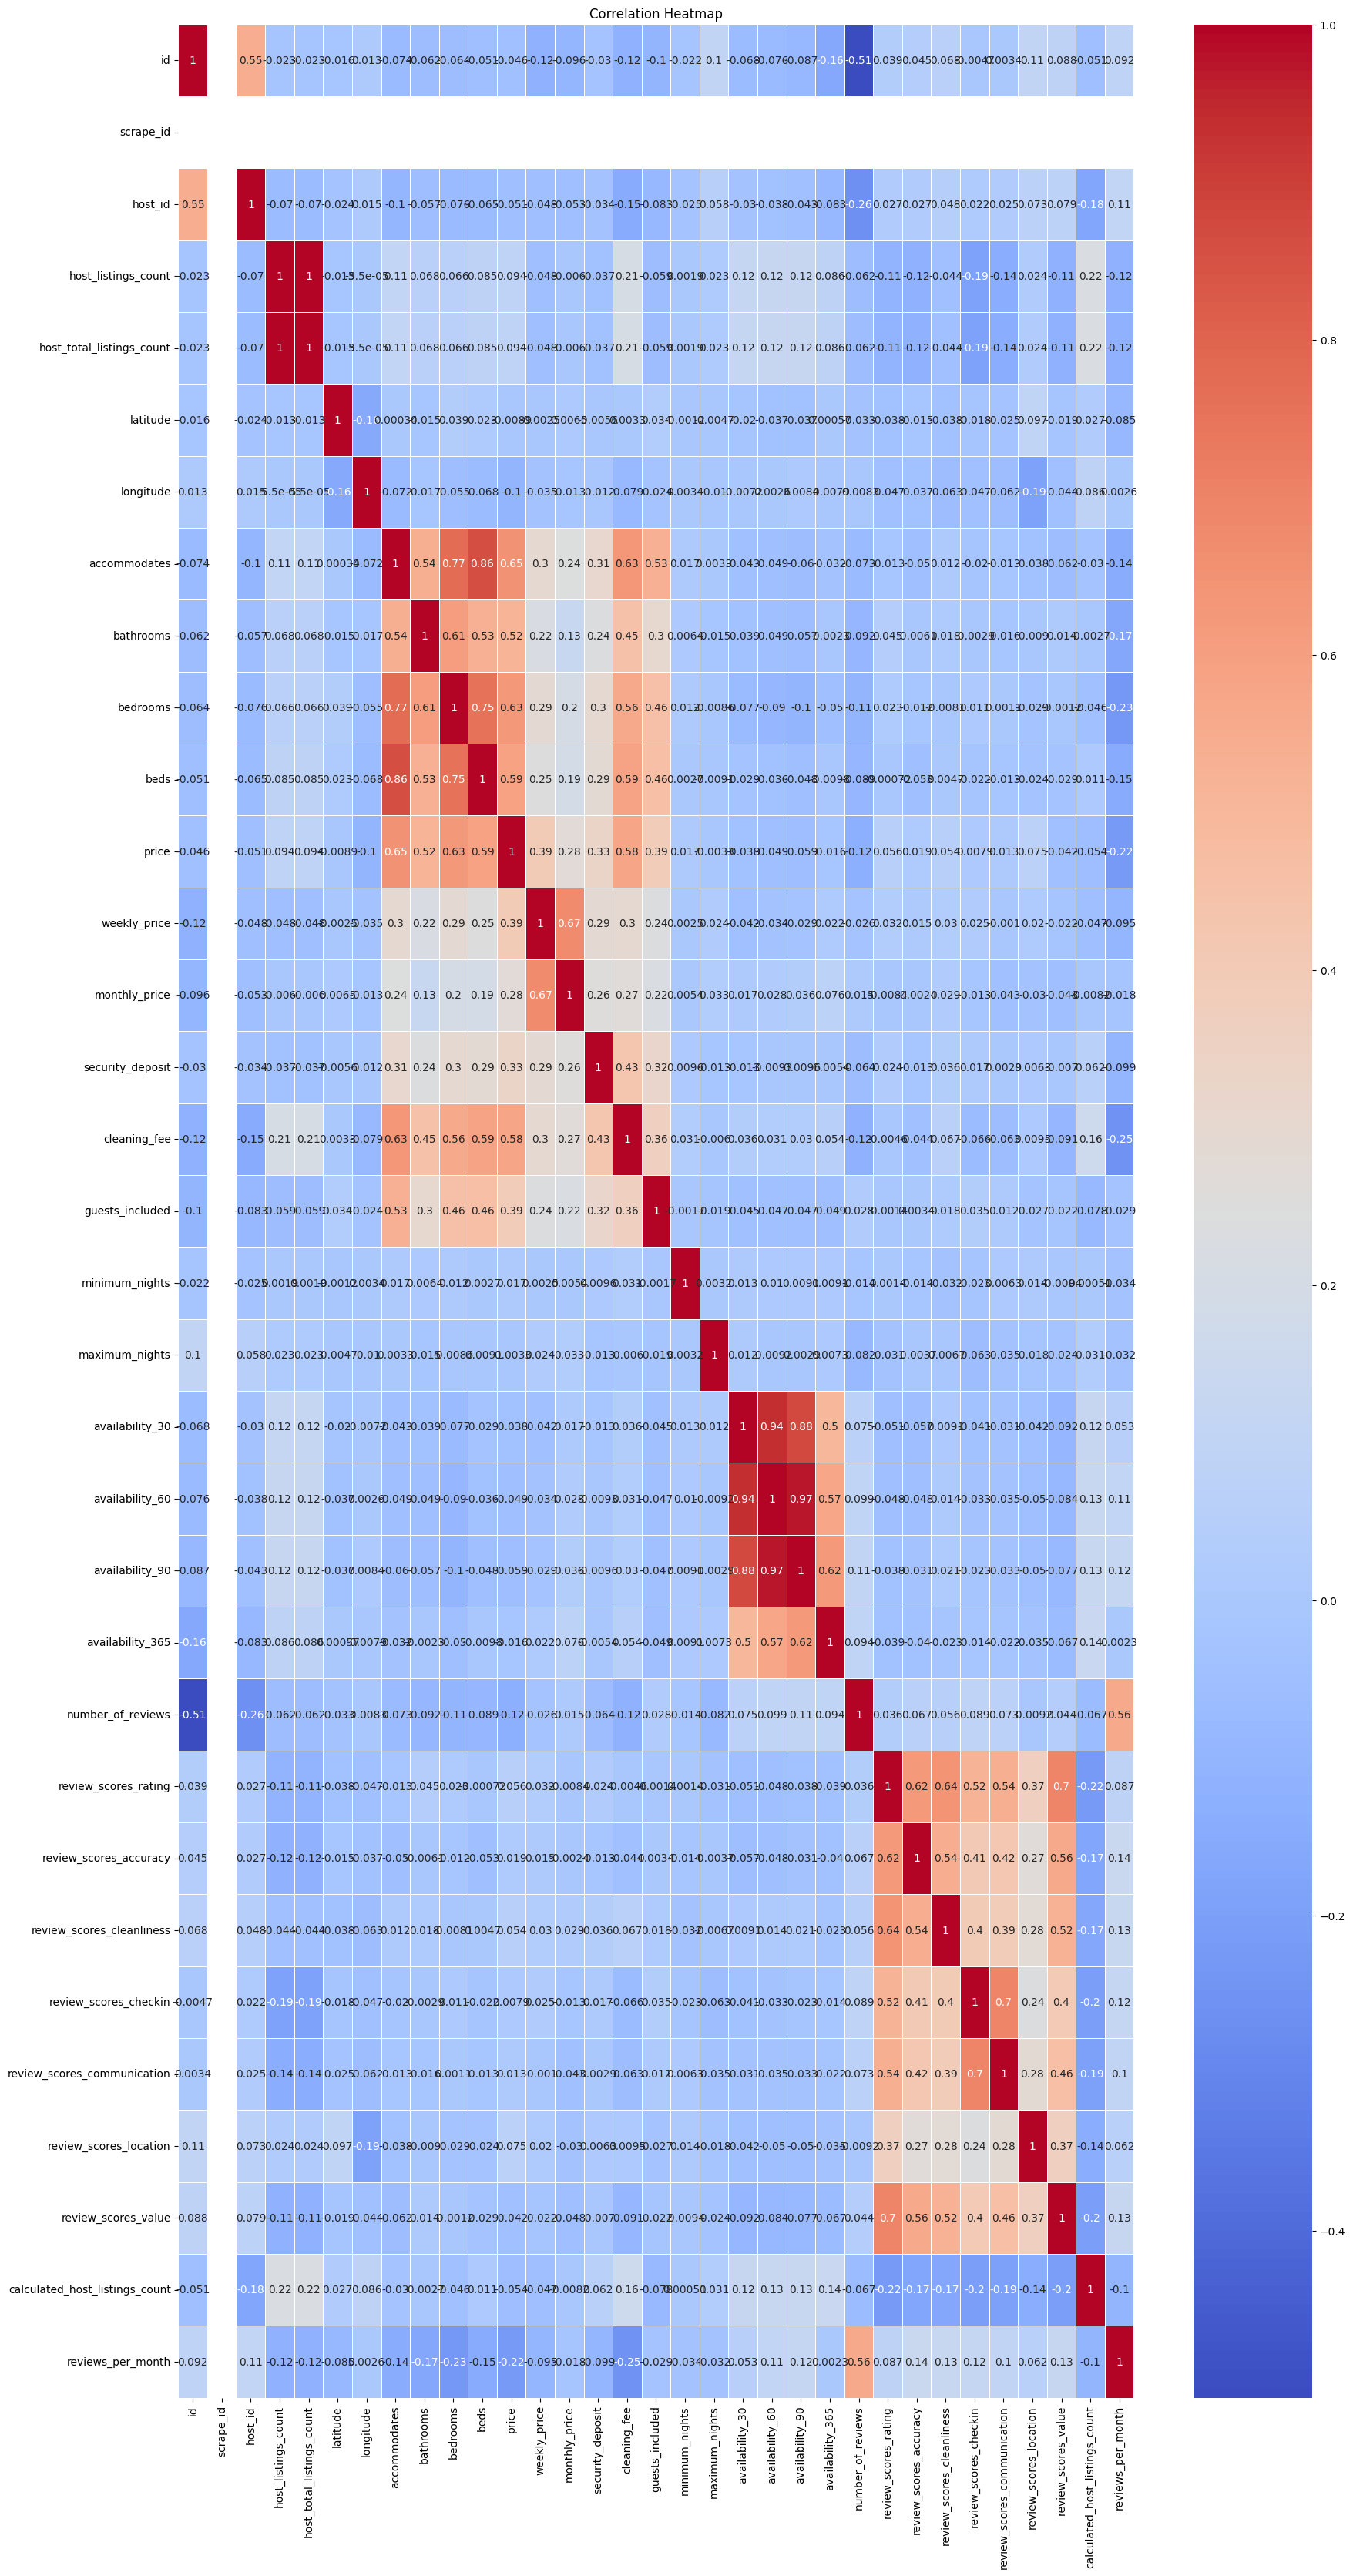

In [13]:
numeric_columns = df_listing.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(20,40))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
avgpriceneighbour= df_listing.groupby('neighbourhood')['price'].mean()
avgpriceneighbour.sort_values(ascending=False)

neighbourhood
Fairmount Park         370.000000
Industrial District    245.000000
Portage Bay            241.428571
Westlake               197.000000
Alki                   196.652174
                          ...    
Georgetown              77.000000
Rainier Beach           76.722222
Dunlap                  75.461538
Olympic Hills           63.666667
Roxhill                 60.000000
Name: price, Length: 81, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


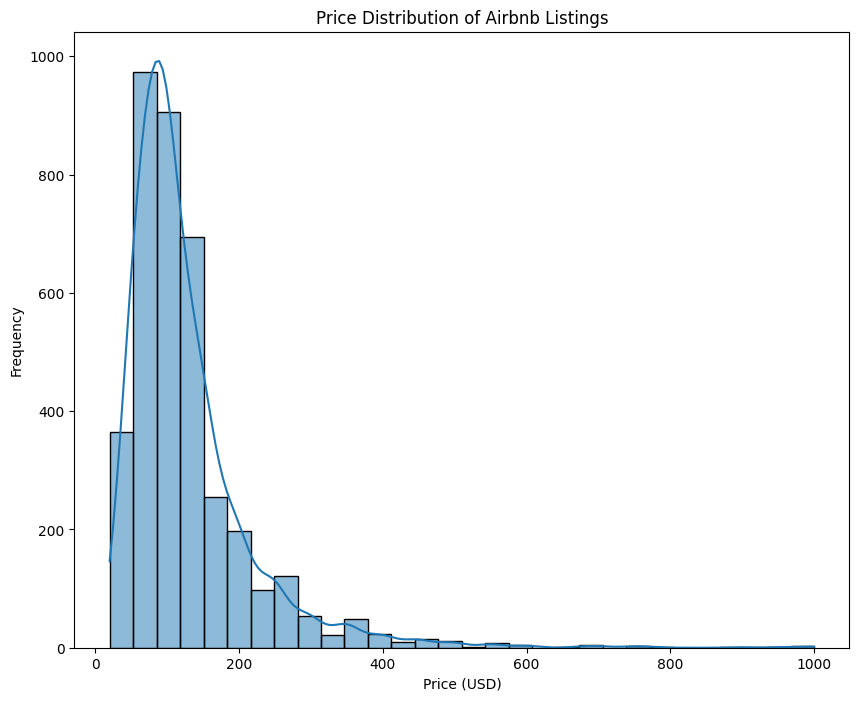

In [20]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df_listing, x='price', bins=30, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

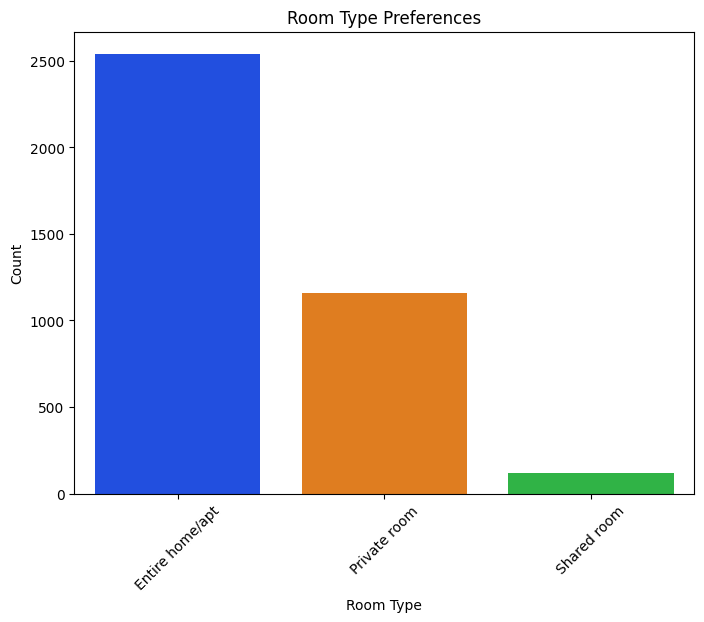

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_listing, x='room_type', palette='bright')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


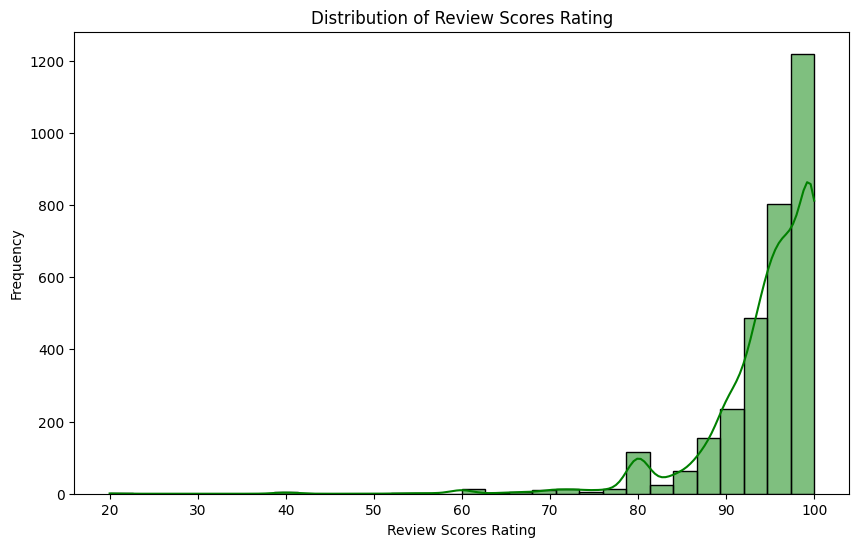

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_listing, x='review_scores_rating', bins=30, kde=True, color='green')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()

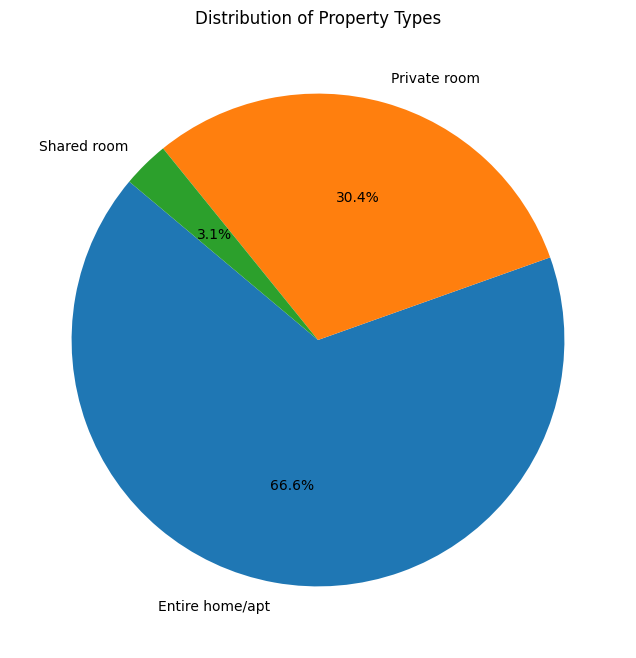

In [30]:
propertycnt = df_listing['room_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(propertycnt, labels=propertycnt.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Types')
plt.show()

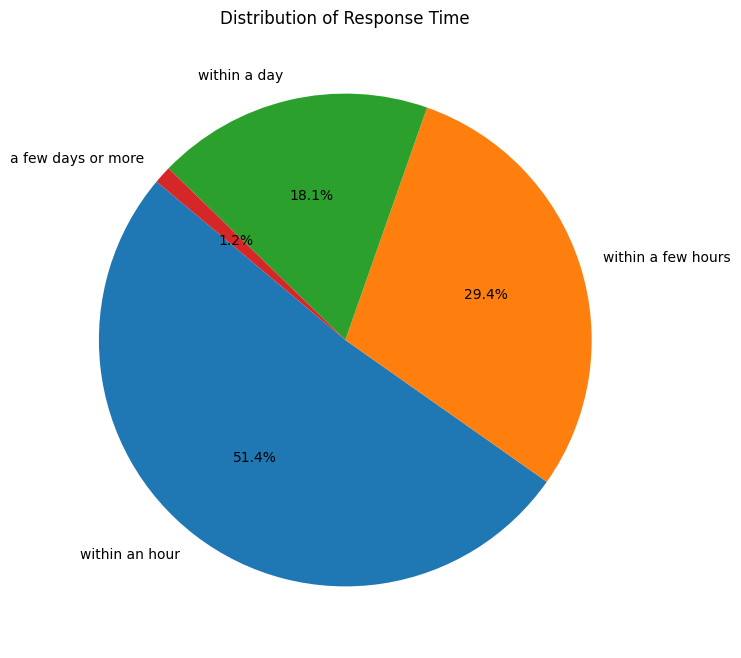

In [31]:
propertycnt = df_listing['host_response_time'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(propertycnt, labels=propertycnt.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Response Time')
plt.show()

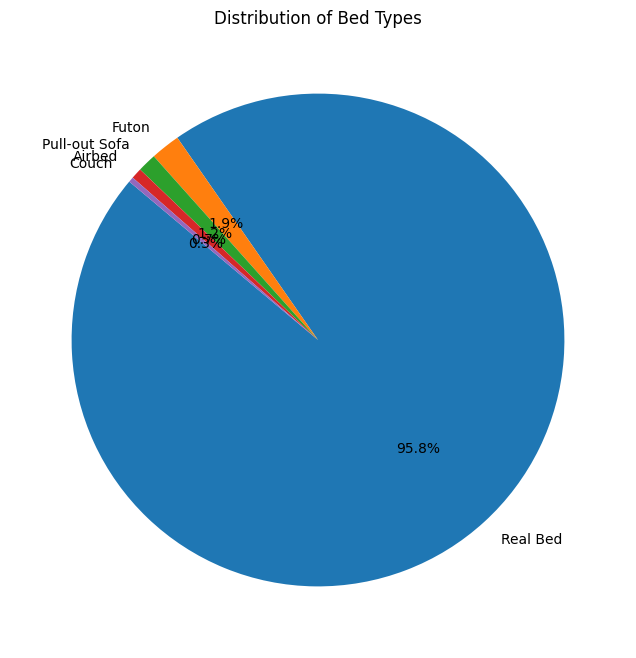

In [32]:
propertycnt = df_listing['bed_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(propertycnt, labels=propertycnt.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bed Types')
plt.show()

**Data Cleaning and EDA on Calender.csv**

In [35]:
df_calender = pd.read_csv('/kaggle/input/seattle/calendar.csv', parse_dates = ['date'])
df_calender.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [36]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


In [40]:
df_calender['price'] = df_calender['price'].fillna('0')
df_calender['price'] = df_calender['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df_calender['available'] = df_calender['available'].replace({'t': 1, 'f': 0})
df_calender['month'] = df_calender['date'].dt.month
df_calender.head(5)

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,0.0,1
3,241032,2016-01-07,0,0.0,1
4,241032,2016-01-08,0,0.0,1


**Visualisation**

(0.0, 350.0)

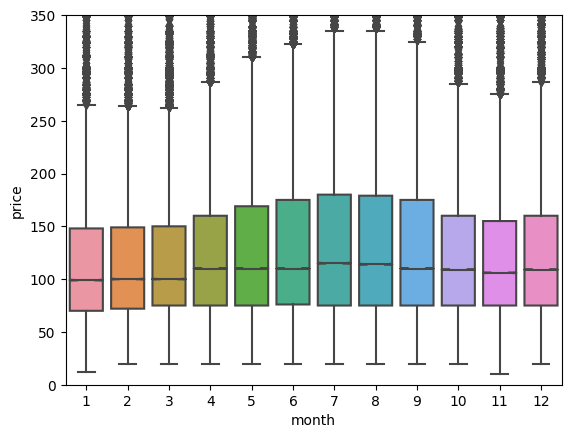

In [42]:
av = df_calender['available'] == 1
bxpt = sns.boxplot(data = df_calender.loc[av,:], x = 'month', y ='price', notch = True)
bxpt.set_xticklabels(bxpt.get_xticklabels())
bxpt.set_ylim(0,350)

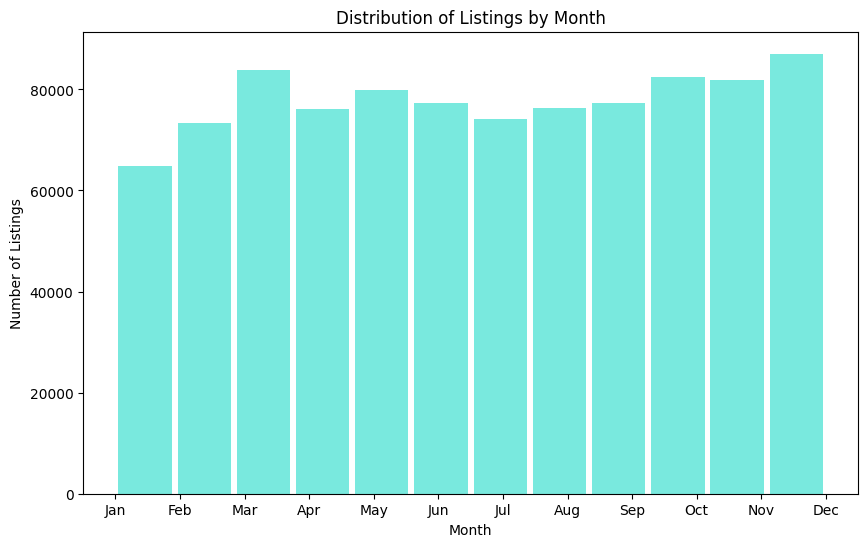

In [46]:
plt.figure(figsize=(10, 6))
month = (df_calender.loc[av,:])['month']
plt.hist( x= month, bins=12, rwidth=0.9, alpha=0.7,color='turquoise')
plt.title('Distribution of Listings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Data Cleaning and EDA on Reviews.csv**

In [57]:
df_review = pd.read_csv('/kaggle/input/seattle/reviews.csv')
df_review.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [58]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [59]:
df_review.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [60]:
df_review = df_review.dropna()

In [61]:
print("Number of unique listings: {0}".format(df_review['listing_id'].nunique()))
print("Number of unique reviewers: {0}".format(df_review['reviewer_id'].nunique()))

Number of unique listings: 3191
Number of unique reviewers: 75717


In [70]:
df_review['date'] = pd.to_datetime(df_review['date'])
print("Earliest review date: {0}".format(df_review['date'].min()))
print("Latest review date:{0}".format(df_review['date'].max()))

Earliest review date: 2009-06-07 00:00:00
Latest review date:2016-01-03 00:00:00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


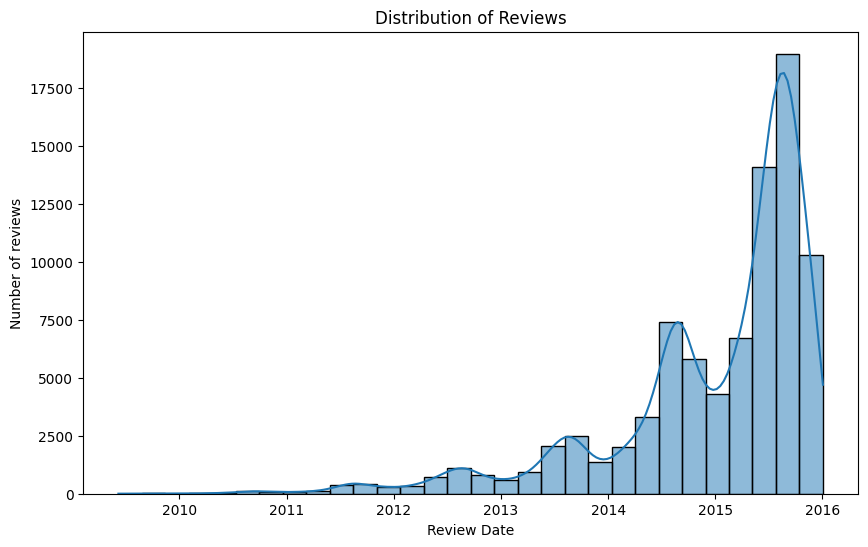

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df_review['date'], bins=30, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Review Date')
plt.ylabel('Number of reviews')
plt.show()

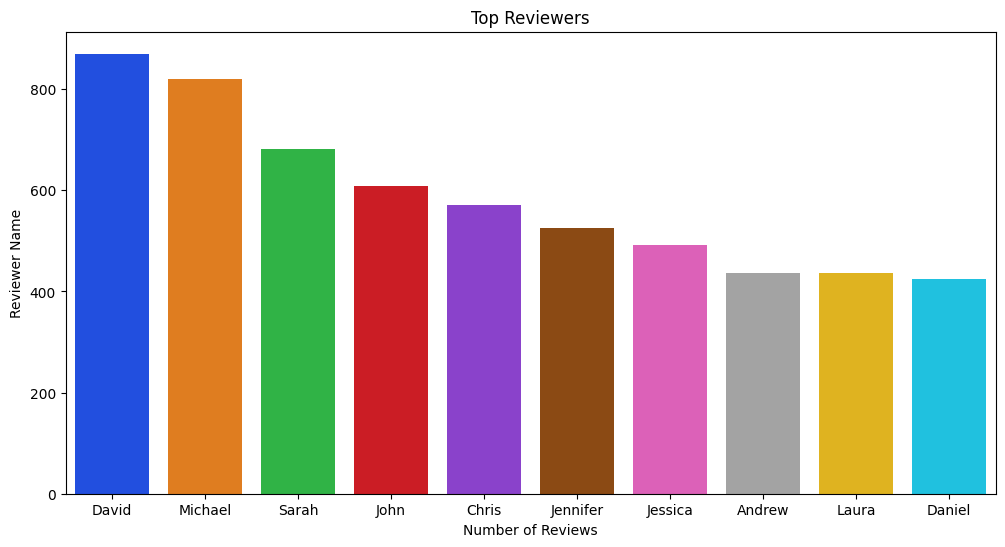

In [82]:
s=df_review['reviewer_name'].value_counts().head(10)
# print("Top 10 Reviewers: {0}".format(s))
plt.figure(figsize=(12, 6))
sns.barplot(y=s.values, x=s.index, palette="bright")
plt.title('Top Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Name')
plt.show()